## Task 4 SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Read the csv data into a pandas dataframe and display the first 5 samples

In [75]:
df = pd.read_csv('heart_disease.csv')
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### How many Categorical variables in the dataset?

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [77]:
df.isnull().sum().sum()

645

### Bonus: Visual representation of missing values

<AxesSubplot:>

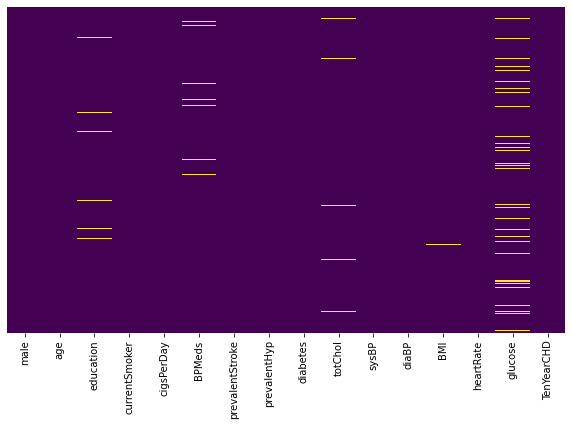

In [78]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [79]:
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [80]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

### Split data into dependent (y) and independent (X) variables 
Hint: TenYearCHD is the target

In [81]:
y = df.loc[:, df.columns != 'TenYearCHD']
y

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN


In [82]:
X = df.loc[:, df.columns == 'TenYearCHD']
X

,TenYearCHD
0,0
1,0
2,0
3,1
4,0
...,...
4233,1
4234,0
4235,0
4236,0


### Fit the imputer model on dataset to calculate statistic for each column

In [83]:
imputer.fit(X)

SimpleImputer()

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [84]:
X_trans = imputer.transform(X)

### Sanity Check: Whether missing values are filled or not

In [85]:
 df.notnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4234,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4235,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True
4236,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True


### Let's try to visualize the missing values.
##### Hint: Heatmap needs a DataFrame and not a Numpy Array

<AxesSubplot:>

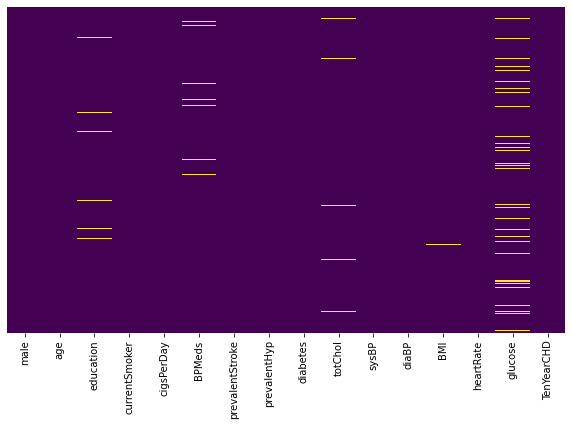

In [86]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Split the dataset into train and test data

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1)

# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [88]:
X = pd.DataFrame({'Age':[20, 30, 10, np.nan, 10]}) 
X
imputer = SimpleImputer(strategy='mean')

imputer = SimpleImputer()
imputer.fit_transform(X)

array([[20. ],
       [30. ],
       [10. ],
       [17.5],
       [10. ]])

### Create a Logistic Regression model

In [89]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### Train the model

In [90]:
model.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (2966, 15) instead.

### Apply the model

In [67]:
predictions = model.predict(X_test)
predictions

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Find how well the trained model did with testing data

In [38]:
model.score(X_test, y_test)

NameError: name 'model' is not defined

### Any observations? 

In [93]:
print("Observations:")

Observations:
